## Atividade 4

## Classificador de imagens de dia e noite


Utilizando o conjunto de imagens do dataset do projeto [AMOS](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes), construir um classificador de imagens que dado uma determinada imagem deverá ser capaz em classificar em _dia_ ou _noite_.

Para este modelo, será levado em consideração como principal característica seu respectivo valor de brilho.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

## 2. Principais atividades do _pipeline_

1. Normalizar
2. Extrair características
3. Construir classificador
4. Testar o modelo

*Adaptado deste [repositório](https://github.com/udacity/CVND_Exercises/blob/master/1_1_Image_Representation) de Visão Computacional da Udacity, de Cezanne Camacho.*

In [6]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

%matplotlib inline

def carregar_arquivos(image_dir):
    
    im_list = []
    image_types = ["day", "night"]
    
    for im_type in image_types:
        
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            im = cv2.imread(file)
            
            if not im is None:
                im_list.append((im, im_type))
    
    return im_list

In [2]:
lista_imagens_teste = carregar_arquivos("imagens/test")
lista_imagens_treinamento = carregar_arquivos("imagens/training")

## 3. Normalização

Constuir uma função que receberá uma imagem e redimensionará para o tamanho 1000 x 600.
Vamos inspecionar algumas imagens.

Esta a seguir possui 700 de altura 1300 de comprimento.

Text(0.5, 1.0, 'night')

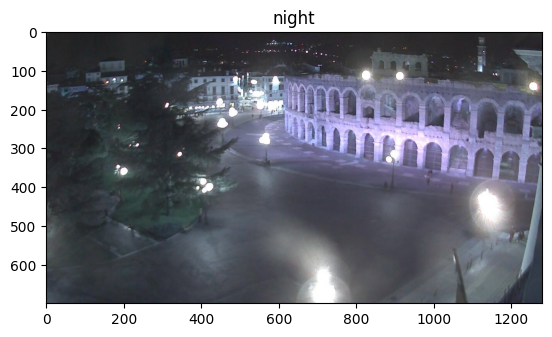

In [3]:
plt.imshow(lista_imagens_treinamento[200][0])
plt.title(lista_imagens_treinamento[200][1])

Já esta nova imagem é menor, possuindo 350 x 650 pixels.

Text(0.5, 1.0, 'day')

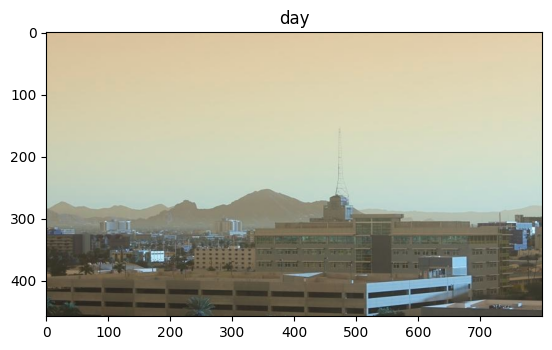

In [4]:
plt.imshow(lista_imagens_treinamento[0][0])
plt.title(lista_imagens_treinamento[0][1])

In [ ]:
lista_imagens_treinamento[0][0] -> array

In [22]:
def padronizar_imagem(image_array):
    return np.array(Image.fromarray(image_array).convert("L").resize((1000, 600)))

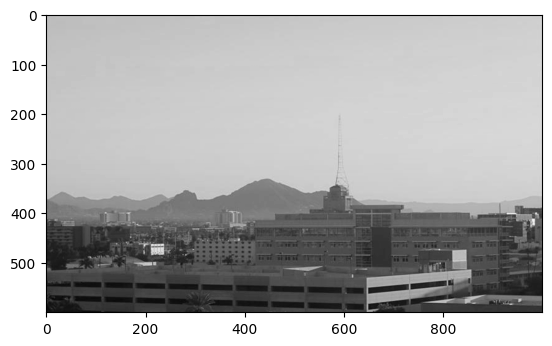

In [26]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[0][0]), cmap = "gray")

## 4. Extração de características

Para cada imagem analisada, extrair o componente de brilho médio associado.

In [18]:
def extrair_brilho_medio(image_array):
    return np.mean(image_array)

In [19]:
extrair_brilho_medio(lista_imagens_treinamento[0][0])

162.04389647016012

Agora vamos construir uma lista com todas as imagens e seus brilhos médios extraídos. Vamos também rotular as imagens utilizando hot-enconding, sendo 1 para dia e 0 para noite.

In [60]:
def extrair_caracteristica_imagem(lista_imagem):
    
    lista_imagem_padrao = [(extrair_brilho_medio(padronizar_imagem(img)), label) for img, label in lista_imagem]
    
    return lista_imagem_padrao

In [61]:
lista_padronizada_treinamento = extrair_caracteristica_imagem(lista_imagens_treinamento)

Testando a rotulação de imagem e padronização.

Text(0.5, 1.0, 'day')

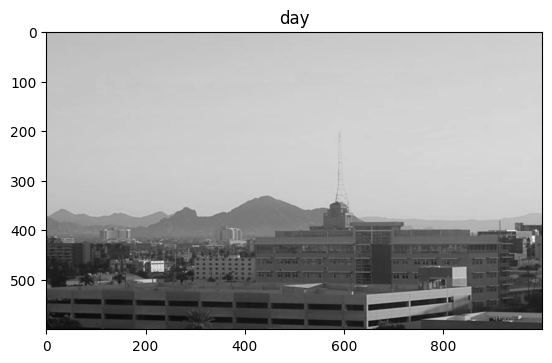

In [62]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[0][0]), cmap = "gray")
plt.title(lista_imagens_treinamento[0][1])

Text(0.5, 1.0, 'night')

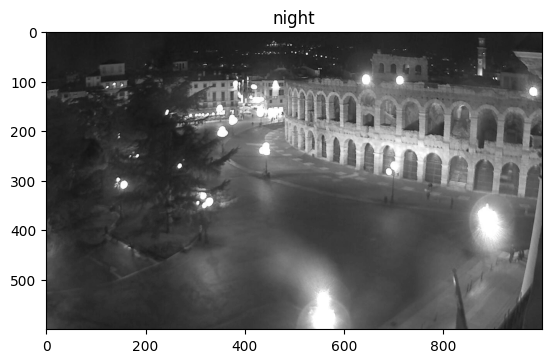

In [64]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[200][0]), cmap = "gray")
plt.title(lista_padronizada_treinamento[200][1])

Obtendo as características de ambos os grupos de imagens, treinamento e testes.

In [65]:
lista_padronizada_treinamento = extrair_caracteristica_imagem(lista_imagens_treinamento)
lista_padronizada_teste = extrair_caracteristica_imagem(lista_imagens_teste)

## 5. Construção do classificador

Desenvolver um modelo de aprendizado de máquina que seja capaz de classificar adequadamente, com no mínimo 90% de acurácia, as imagens que representam o dia e a noite.

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

classificador_decision_tree = DecisionTreeClassifier(random_state=0)

A função a seguir é para padronizar a forma que o ``ScikitLearn`` obtém os dados, separando o que é classe (Y) do que é feature (X).

In [67]:
def definicao_feature_class(lista_padronizada):
    X = []
    Y = []

    for item in lista_padronizada:
        X.append(item[0])
        Y.append(item[1])

    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)

    return X, Y

In [68]:
X, Y = definicao_feature_class(lista_padronizada_treinamento)

In [69]:
classificador_decision_tree.fit(X, Y)

DecisionTreeClassifier(random_state=0)

Testando algumas classificações.

Text(0.5, 1.0, 'day')

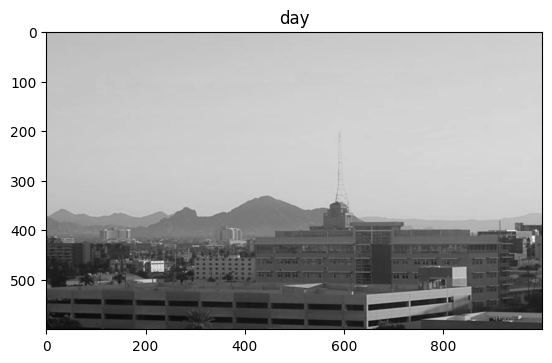

In [70]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[0][0]), cmap = "gray")
plt.title(lista_imagens_treinamento[0][1])

In [72]:
classificador_decision_tree.predict(np.array(lista_padronizada_treinamento[0][0]).reshape(-1, 1))

array(['day'], dtype='<U5')

Text(0.5, 1.0, 'night')

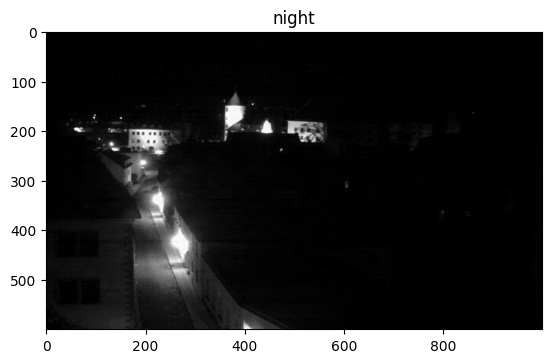

In [74]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[150][0]), cmap = "gray")
plt.title(lista_imagens_treinamento[150][1])

In [75]:
classificador_decision_tree.predict(np.array(lista_padronizada_treinamento[150][0]).reshape(-1, 1))

array(['night'], dtype='<U5')

## 6. Teste do modelo

Dado o conjunto de testes, verificar a acurácia do modelo.

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

X_test, Y_test = definicao_feature_class(lista_padronizada_teste)
Y_pred = classificador_decision_tree.predict(np.array(X_test).reshape(-1, 1))

## 6.1 Precisão

Calcular a precisão do modelo com base os dados de teste.

In [83]:
print(f"Acuracia do modelo é de : {round(accuracy_score(y_pred = Y_pred, y_true = Y_test), 2)}")

Acuracia do modelo é de : 0.97


In [89]:
# print(f"Precisao do modelo é de : {round(precision_score(y_pred = Y_pred, y_true = Y_test), 2)}")

In [90]:
print(classification_report(y_pred = Y_pred, y_true = Y_test))

              precision    recall  f1-score   support

         day       0.96      0.97      0.97        80
       night       0.97      0.96      0.97        80

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



## 6.2 Matriz de confusão

Calcular a matriz de confusão do modelo, levando em consideração os dados de teste.

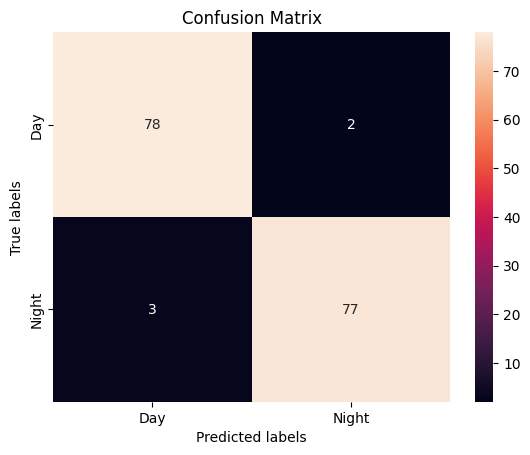

In [96]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_pred = Y_pred, y_true = Y_test), annot = True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Day', 'Night'])
ax.yaxis.set_ticklabels(['Day', 'Night']);